In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

## Implementing Identification of Number With MNIST Dataset

In [2]:
mnist= tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_test_for_viewing= X_test

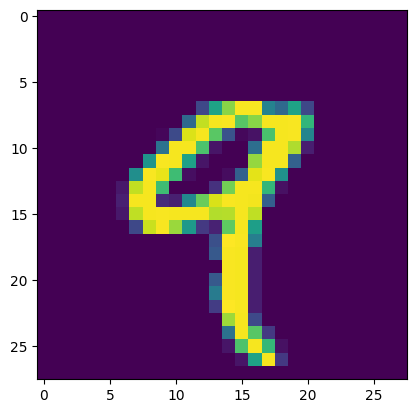

Label: 9


In [4]:
plt.imshow(X_train[4])
plt.show()
print(f'Label: {y_train[4]}')

# Task is to implement a perceptron that differentiates between numbers with a round shape in them and numbers with none.
## namely {0, 6, 8, 9} which will belong to class 1 (round shape= True)
## and {1, 2, 3, 4, 5, 7} which will belong to class -1 (round shape= False)

In [5]:
y_train= pd.DataFrame(y_train)
y_test= pd.DataFrame(y_test)

In [6]:
y_train

,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [7]:
y_test.head()

,0
0,7
1,2
2,1
3,0
4,4


In [8]:
y_train['label']= y_train[0].apply(lambda x: 1 if x in [0, 6, 8, 9] else -1)

In [9]:
y_test['label']= y_test[0].apply(lambda x: 1 if x in [0, 6, 8, 9] else -1)

In [10]:
y_train.head()

,0,label
0,5,-1
1,0,1
2,4,-1
3,1,-1
4,9,1


In [11]:
y_train= y_train['label']
y_test= y_test['label']

In [12]:
def verify_labels(X, y):
    print('----The Image----')
    plt.imshow(X)
    plt.show()
    print('----The Label----')
    print(y)

----The Image----


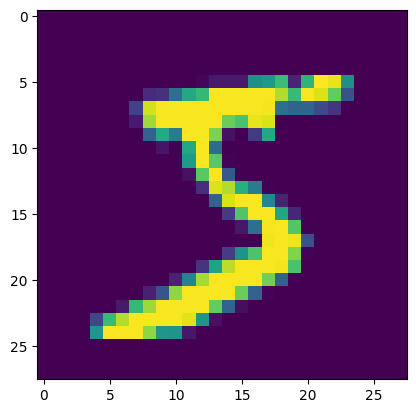

----The Label----
-1
----The Image----


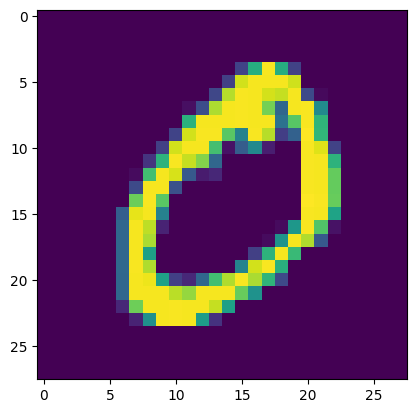

----The Label----
1
----The Image----


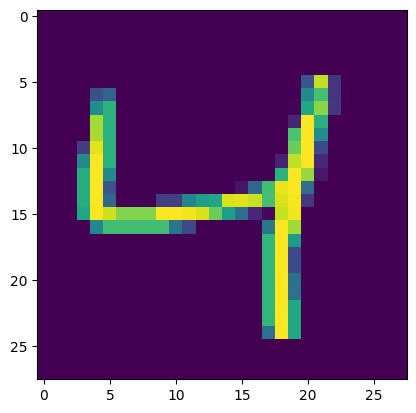

----The Label----
-1
----The Image----


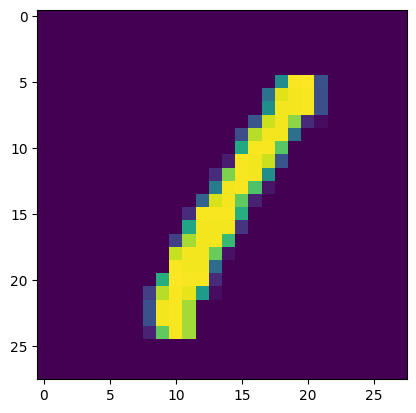

----The Label----
-1


In [13]:
for i in range(0,4):
    verify_labels(X_train[i], y_train[i])

----The Image----


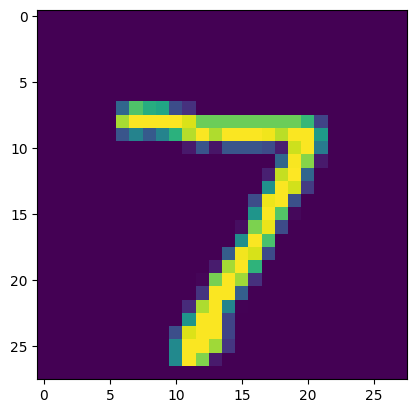

----The Label----
-1
----The Image----


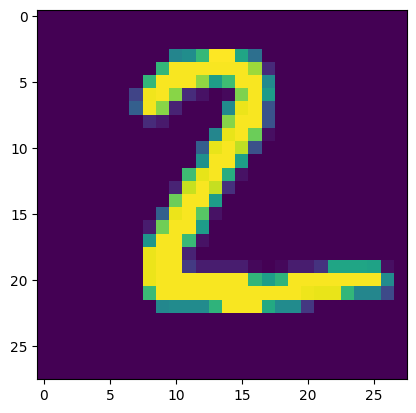

----The Label----
-1
----The Image----


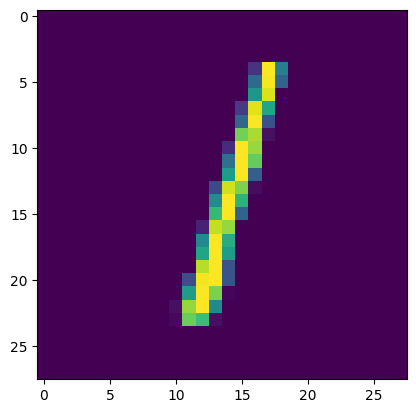

----The Label----
-1


In [14]:
for i in range(0,3):
    verify_labels(X_test[i], y_test[i])

In [15]:
X_train= tf.keras.utils.normalize(X_train, axis=1)

In [16]:
X_test= tf.keras.utils.normalize(X_test, axis=1)

----The Image----


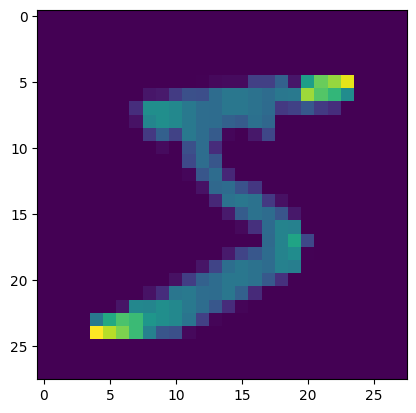

----The Label----
-1
----The Image----


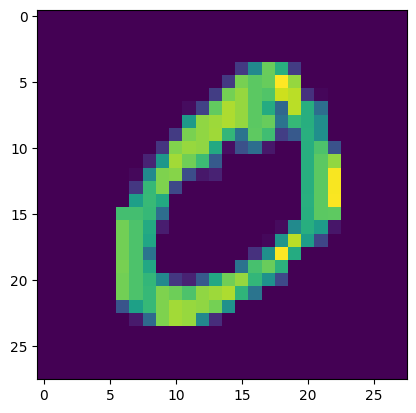

----The Label----
1


In [17]:
for i in range(0, 2):
    verify_labels(X_train[i], y_train[i])

In [18]:
X_train.shape

(60000, 28, 28)

In [19]:
X_train= X_train.reshape(60000, 784)

In [20]:
X_train.shape

(60000, 784)

In [21]:
X_test.shape

(10000, 28, 28)

In [22]:
X_test= X_test.reshape(10000, 784)

In [23]:
X_test.shape

(10000, 784)

In [24]:
def Perceptron_Predict(W, X):
    
    z= np.dot(W.T, X)

    return 1 if z >= 0 else -1

In [25]:
def get_output(W, X): #For getting output of perceptron for given input and weights
    
    return np.dot(W.T, X)

In [26]:
def is_missclassified(y, z):
    return y*z < 0 #If this y*z -ve, then miss-classification is caught...
                    #where y --> actual
                            #z --> prediction

In [27]:
def update_rule(W, X, y, lr): #perceptron update rule: w_new <--- w_old + yx
    return W + (lr * (y * X))

In [28]:
def Perceptron_Algorithm(W, X, Y, lr, epochs=2):
    
    n_epochs = 0
    while True:
        n_epochs = n_epochs + 1
        miss_classifications= 0 
        
        for i in range(0, len(Y)):
            
            z= get_output(W, X[i])
            
            if is_missclassified(Y[i], z):
                
                W= update_rule(W, X[i], Y[i], lr)
                miss_classifications = miss_classifications + 1
        
        
        if miss_classifications == 0 or n_epochs == epochs:
            print(f'Learning Complete at epoch {n_epochs}\nOptimal Hyperplane Weighs Are {W}' )
            return W
        
        

In [29]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test= np.c_[np.ones(X_test.shape[0]), X_test]

In [30]:
print(X_train[0])

[1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [31]:
X_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [32]:
X_train.shape

(60000, 785)

In [33]:
initial_weights= np.ones(X_train.shape[1])

In [34]:
initial_weights.shape

(785,)

In [35]:
weights= Perceptron_Algorithm(initial_weights, X_train, y_train, 0.1, 10)

Learning Complete at epoch 10
Optimal Hyperplane Weighs Are [-3.70000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  9.81767512e-01  6.34017052e-01  6.62687527e-01
  9.85183337e-01  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.01126900e+00  1.40573243e+00
  1.37163919e+00  1.49372353e+00  9.88515193e-01  9.21360090e-01
  6.96957714e-01  1.11694787e+00  1.03352504e+00  1.74472223e-01
  9.02591057e-01  1.44913347e+00  1.28113283e+00  1.07594321e+00
  1.00180759e+00  1.03887745e+00  1.07152633e+00  1.01350015e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+

In [36]:
for i in range(0,5):
    print(f'Actual Label is ---> {y_test[i]}')
    y_pred= Perceptron_Predict(weights, X_test[i])
    print(f'Predicted Label is: {y_pred}')

Actual Label is ---> -1
Predicted Label is: -1
Actual Label is ---> -1
Predicted Label is: -1
Actual Label is ---> -1
Predicted Label is: -1
Actual Label is ---> 1
Predicted Label is: 1
Actual Label is ---> -1
Predicted Label is: -1


In [37]:
y_pred= []
for i in range(len(y_test)):
    y_pred.append(Perceptron_Predict(weights, X_test[i]))

In [38]:
y_pred= np.array(y_pred)

In [39]:
y_pred

array([-1, -1, -1, ...,  1, -1,  1])

In [40]:
from sklearn.metrics import accuracy_score

accuracy= accuracy_score(y_test, y_pred)

print(f'Accuracy of Perceptron--> {accuracy}')

Accuracy of Perceptron--> 0.8136


----The Image----


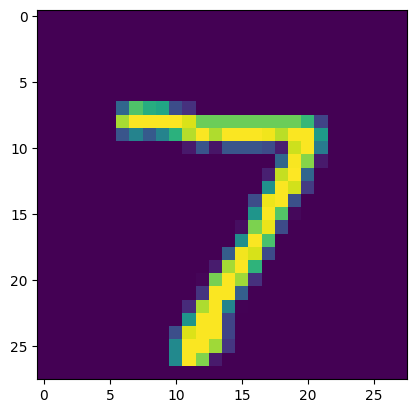

----The Label----
-1
Predicted Label by the Perceptron---> -1
----The Image----


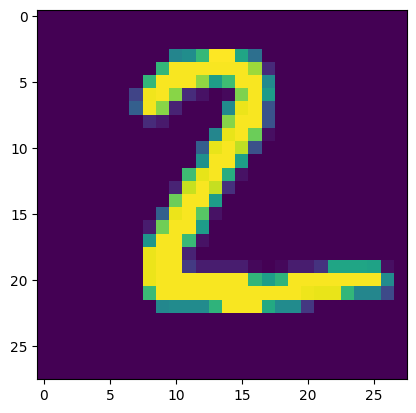

----The Label----
-1
Predicted Label by the Perceptron---> -1
----The Image----


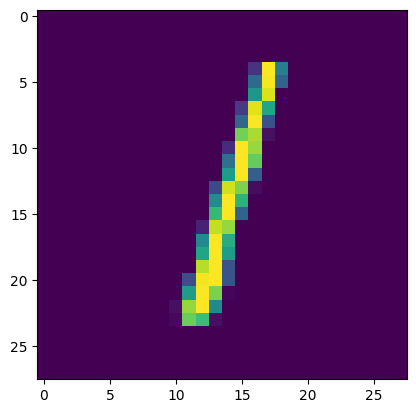

----The Label----
-1
Predicted Label by the Perceptron---> -1
----The Image----


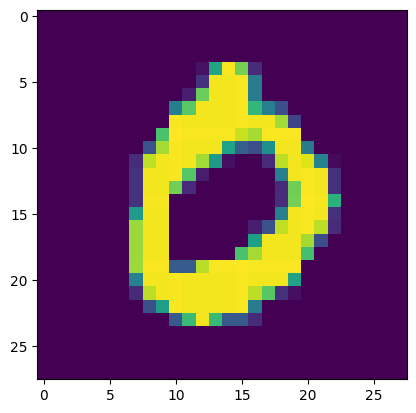

----The Label----
1
Predicted Label by the Perceptron---> 1


In [41]:
for i in range(0,4):
    verify_labels(X_test_for_viewing[i], y_test[i])
    print(f'Predicted Label by the Perceptron---> {Perceptron_Predict(weights, X_test[i])}')
    

In [42]:
def plot_predictions(X_test, X_test_for_viewing, y_test, weights, perceptron_predict, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 10))  
    
    for i, ax in enumerate(axes):
        if i >= len(X_test):
            break  
        
        predicted_label = perceptron_predict(weights, X_test[i])
        ax.imshow(X_test_for_viewing[i], cmap='gray')  
        ax.set_title(f'True: {y_test[i]}\nPred: {predicted_label}')
        ax.axis('off')  
    
    plt.tight_layout()
    plt.show()



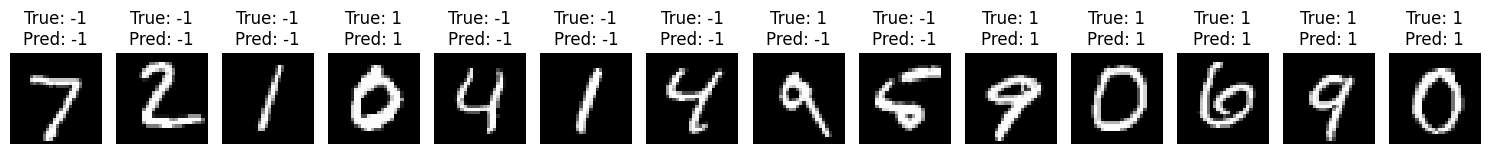

In [43]:
plot_predictions(X_test, X_test_for_viewing, y_test, weights, Perceptron_Predict, num_images=14)

## Implementing Equation ---> (A NAND B) XOR (A OR B)

In [44]:
X_NAND= np.array([(1,0,0),
         (1,0,1),
         (1,1,0),
         (1,1,1)])
y_nand= np.array([1, 1, 1, -1])

In [45]:
initial_nand_w= np.array([0.2, -0.1, 0.8])

In [46]:
X_OR= np.array([(1,0,0),
         (1,0,1),
         (1,1,0),
         (1,1,1)])
y_or= np.array([-1, 1, 1, 1])

In [47]:
initial_or_w= np.array([0.12, -0.4, -0.33])

In [48]:
X_XOR= np.array([(1,0,0),
         (1,0,1),
         (1,1,0),
         (1,1,1)])
y_xor= np.array([-1, 1, 1, -1])

In [49]:
initial_xor_w= np.array([-0.87, 0.94, -0.67])

In [50]:
def train_NAND(W, X, y):
    return Perceptron_Algorithm(W, X, y, 0.1, 100)

In [51]:
def train_OR(W, X, y):
    return Perceptron_Algorithm(W, X, y, 0.1, 100)

In [52]:
def train_XOR(W, X, y):
    return Perceptron_Algorithm(W, X, y, 0.1, 100)

In [53]:
NAND_Weights= train_NAND(initial_nand_w, X_NAND, y_nand)

Learning Complete at epoch 12
Optimal Hyperplane Weighs Are [ 0.2 -0.2 -0.1]


In [54]:
OR_Weights= train_OR(initial_or_w, X_OR, y_or)

Learning Complete at epoch 10
Optimal Hyperplane Weighs Are [-0.08  0.1   0.17]


In [55]:
XOR_Weights= train_XOR(initial_xor_w, X_XOR, y_xor)

Learning Complete at epoch 100
Optimal Hyperplane Weighs Are [ 0.03 -0.06 -0.07]


## We Have trained 3 perceptrons on each of the gates NAND, OR, and XOR respecively. Now we will perform a feed forward in a multilayer method

In [56]:
X_test = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])

In [57]:
NAND_OUTPUT= []
NAND_OUTPUT.extend(
    Perceptron_Predict(NAND_Weights, X_test[i]) for i in range(len(X_test))
)

In [58]:
OR_OUTPUT= []
OR_OUTPUT.extend(
    Perceptron_Predict(OR_Weights, X_test[i]) for i in range(len(X_test))
)

In [59]:
NAND_OUTPUT

[1, 1, 1, -1]

In [60]:
OR_OUTPUT

[-1, 1, 1, 1]

In [61]:
X_XOR_INPUT = np.column_stack((np.ones(len(X_test)), NAND_OUTPUT, OR_OUTPUT))

In [62]:
X_XOR_INPUT

array([[ 1.,  1., -1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1., -1.,  1.]])

In [63]:
FINAL_XOR_OUTPUT= []
FINAL_XOR_OUTPUT.extend(
    Perceptron_Predict(XOR_Weights,X_XOR_INPUT[i]) for i in range(len(X_XOR_INPUT))
)

In [64]:
FINAL_XOR_OUTPUT

[1, -1, -1, 1]